# Customer Churn Analysis - Exploratory Data Analysis
> In this blog, we will be understanding the modeling of customer churn data and compute the proababilty of churn. This will help to understand the customer behavior and actions leading to churn and take preventive actions to control it.

- toc: true
- comments: true
- categories: [python, churn, retention, classification modeling, exploratory data analysis, matplotlib, seaborn]

## Introduction

Retention is one of the most important criteria to understand the product-market fit for any product. Retention in broad sense means the customers who keep using your product. The customers who leave the platform are said to have churned. Understanding churn is extremely important in order to create streategies for delightful customer experience. Machine learning methods can be used to understand the customer behavioral data of product usage, whcih can be used to model the probability of churn by understanding the patterns of customers who have historically churned. 

In this blog, we have a data from the telecom operator along with the tag whether the customer is retained or churned. It is very important to understand the data before any model is built on it. We will first do exploratory data analysis in this blog. In the next blog, we will develop classification models using Logistic Regression and Decision Tree algorithms.

## Data Source

Data is sourced from the kaggle - https://www.kaggle.com/blastchar/telco-customer-churn. It contains the data for ~7000 telecom customers and have details such as demographics, plan details, usage and churn. Let's explore the dataset.

Import relevant python libraries in the notebook.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Read the data CSV file from the local directory.

In [2]:
df_data = pd.read_csv('Telco-Customer-Churn.csv')
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


As can seen by looking at few rows of the data, it has 21 columns - 1 column with unique identifier for Customer (customerID), 19 features (such as gender, MonthlyCharges, etc.) and 1 target feature (Churn).

Let's have a further look into the data types for each column.

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

As above, there is no missing fields in our data. Most of the features are categorical in the dataset. However, we see that the TotalCharges datatype is object or categorical and it need to be converted to numerical. 

### Data Cleaning

In [4]:
df_data = df_data.dropna(how='all') # remove samples with all missing values
df_data = df_data[~df_data.duplicated()] # remove duplicates
total_charges_filter = df_data.TotalCharges == " "
df_data = df_data[~total_charges_filter]
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges) #converting data type of Total charges to numeric

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

As can be seen above, we have 17 categorical features, three numerical features and one target feature i.e. Churn. Also, the data contains information about 7032 customers.

In [6]:
categorical_features = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
]
numerical_features = [
    'tenure', 
    'MonthlyCharges',
    'TotalCharges'
]
target = 'Churn'

## Data Visualization

### Python Libraries

Let's import the relevant Python data visualization libraries in the notebook.

- matplotlib.pyplot: https://matplotlib.org/api/pyplot_api.html. It provides a nice MATLAB-like plotting framework to create data visualizations in Python.
- Seaborn: https://seaborn.pydata.org/introduction.html. It is a library to make statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.
- Gridspec: https://matplotlib.org/3.2.1/tutorials/intermediate/gridspec.html. It provides the function to create multiple grids and specifies subplots with number of rows and number of columns in a grid.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

### Target Variable

"Churn" is our target variable. It has the values whether customer churned or not (Yes, No).

Let's see how many customers have churned. 

It is important to have significant proportion of customers having churned/ not churned for the classification model to perform better. In case the number is not significant for any class, more data needs to be taken or while splitting the data into training and validation sets, it needs to be ensured that sufficient number of customers are available for both classes in the split data.

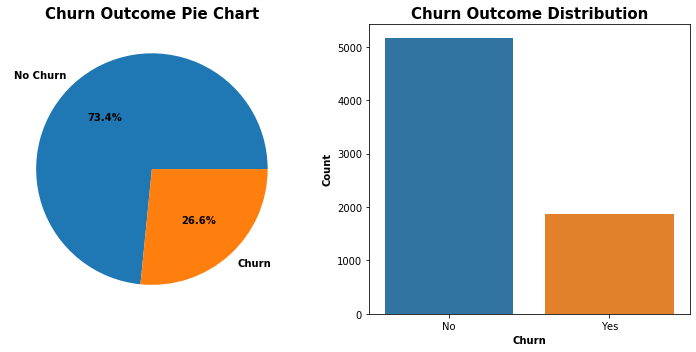

In [8]:
def plot_target_dist(df):
    fig = plt.figure(figsize = (10, 5))
    plt.subplot(121)
    plt.pie(df.Churn.value_counts(),labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1, textprops={'fontsize': 10, 'fontweight': 'bold'})
    plt.title('Churn Outcome Pie Chart', fontsize = 15, fontweight = 'bold')
    plt.subplot(122)
    t = sns.countplot(df.Churn)
    t.set_xlabel('Churn', fontsize = 10, fontweight = 'bold')
    t.set_ylabel('Count', fontsize = 10, fontweight = 'bold')
    plt.title('Churn Outcome Distribution', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()
plot_target_dist(df_data)

The above pie chart and bar chart denotes the distribution of Churned and Not Churned Customers:

We have around 73% of customers (nearly 5000 customers) who are retained with the telecom company and still availing the company's services. Around 27% customers (nearly 2000 customers) have churned and are not using any services of the telecom company. The split between churned and not churned is significant with good number of customers present in both classes.

### Numerical Features

There are three numerical features in the dataset:

1. Tenure - Number of months the customer has been with the company
2. MonthlyCharges - The monthly amount charged to the customer
3. TotalCharges - The total amount charged to the customer

Let us check their distribution using the histogram.

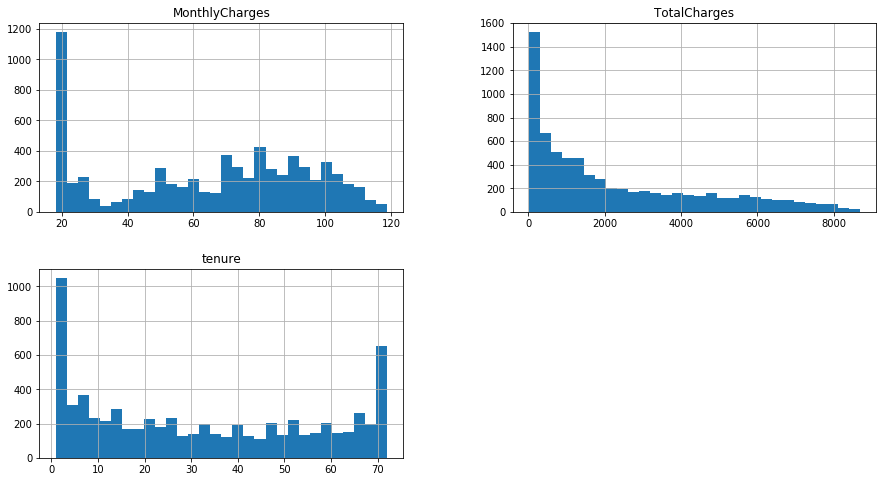

In [9]:
df_data[numerical_features].hist(bins=30, figsize=(15, 8))
plt.show()

From the above histograms, 
1. Most of the customers fall in the tenure of less than 5 months or greather than 70 months with nearly uniform distribution in between these ranges.
2. Most of the customers Monthly Charges is extremely low. 

Let's also look at how churn varies with the tenure of the customer. 

The initial assumption can be that as the customer tenure increases (or customer is availing the company's services for longer time period, the probability of churn decreases). Let's check this assumption. 

We can create a copy of our data and replace the classes in "Churn" column with binary variables: 0= No Churn, 1= Churn. The mean of this field would provide the churn rate. The scatter plot of "Tenure vs Churn" would help in visualization of how churn is affected by tenure.

In [10]:
copy = df_data.copy()
copy.loc[copy.Churn=='No','Churn'] = 0 
copy.loc[copy.Churn=='Yes','Churn'] = 1

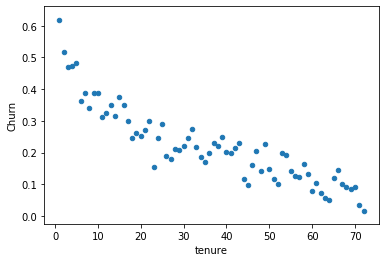

In [11]:
plot1 = copy.groupby('tenure').Churn.mean().reset_index()
plot1.plot(kind="scatter", x='tenure', y='Churn')

The initial assumption is verified. Churn in-fact decreases as the tenure increases as seen from the downward trend in the above scatter plot.

However, we will be able to get better insights by clubbing the tenure months into groups.

In [12]:
def tenure_groups(df):
    if df.tenure <= 12:
        return "less_than_1"
    elif (df.tenure > 12) & (df.tenure <= 24):
        return "less_than_2"
    elif (df.tenure > 24) & (df.tenure <= 36):
        return "less_than_3"
    elif (df.tenure > 36) & (df.tenure <= 48):
        return "less_than_4"
    elif (df.tenure > 48) & (df.tenure <= 60):
        return "less_than_5"
    else:
        return "greater_than_5"

df_data['grouped_tenure'] = df_data.apply(tenure_groups, axis=1)

df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,grouped_tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,less_than_1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,less_than_3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,less_than_1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,less_than_4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,less_than_1


Let's save this data file for further use.

In [13]:
df_data.to_csv('Telco-Customer-Churn-Final.csv', index=False)

We can see the count of customers who have churned and not churned for each of these tenure groups.

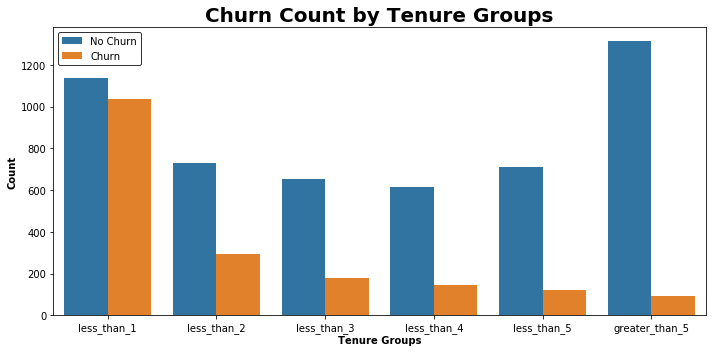

In [14]:
def tenure_group_counts(df):
    plt.figure(figsize = (10,5))
    t = sns.countplot(data = df, x = 'grouped_tenure', hue = 'Churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5'])
    t.set_title('Churn Count by Tenure Groups', fontsize = 20, fontweight = 'bold')
    t.set_xlabel('Tenure Groups',fontsize = 10, fontweight = 'bold', labelpad = 1.5)
    t.set_ylabel('Count', fontsize = 10, fontweight = 'bold')
    t.legend(loc = 'upper left', fontsize = 10, labels = ['No Churn', 'Churn'], edgecolor = 'black')
    plt.tight_layout()
    
tenure_group_counts(df_data)

We can see that most of the customers fall in tenure group of "less_than_1" or "greater_than_5" years and proportion of customers churning is higher in lower tenure groups.

We can also look at the plot of average monthly and total charges for different tenure groups for churned and not churned customers.

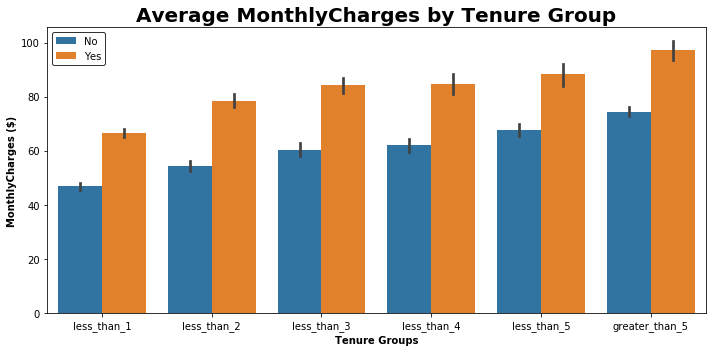

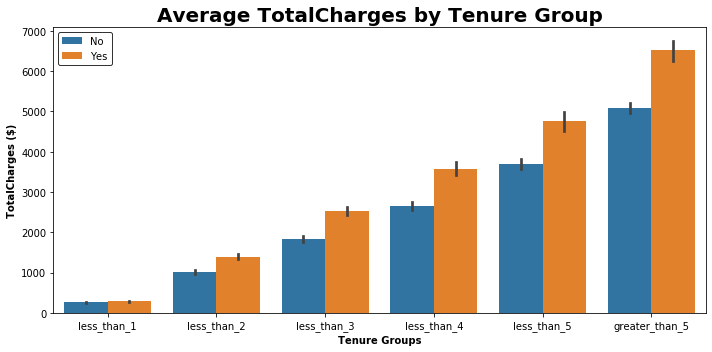

In [15]:
def plot_numerical_averages(df, feature):
    fig = plt.figure(figsize = (10, 5))
    b = sns.barplot(data = df, x = 'grouped_tenure', y = feature, hue = 'Churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5'])
    b.set_xlabel('Tenure Groups', fontsize = 10, fontweight = 'bold')
    b.set_ylabel(f'{feature} ($)', fontsize = 10, fontweight = 'bold')
    b.set_title(f'Average {feature} by Tenure Group', fontsize = 20, fontweight = 'bold')
    b.legend(fontsize = 10, loc = 'upper left', edgecolor = 'black')
    plt.tight_layout()
plot_numerical_averages(df_data,'MonthlyCharges')
plot_numerical_averages(df_data,'TotalCharges')

Interesting insights from the above plots:
1. Customers who churn are mostly likely to have monthly charges greater than $60.
2. Generally speaking, the likelihood of a customer churning increases as monthly charges increase.
3. From the total charges plot, we can infer that total charges paid by customers increases with their tenure whihc is pretty normal.. Hence, monthly charges plot is more relevant to understand Churn.

### Categorical Features

We have the following 16 categorical features in our dataset:

1. Gender — M/F
2. SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)
3. Partner — Whether customer has a partner or not (Yes, No)
4. Dependents — Whether customer has dependents or not (Yes, No)
5. PhoneService — Whether the customer has a phone service or not (Yes, No)
6. MulitpleLines — Whether the customer has multiple lines or not (Yes, No, No Phone Service)
7. InternetService — Customer’s internet service type (DSL, Fiber Optic, None)
8. OnlineSecurity — Whether the customer has Online Security add-on (Yes, No, No Internet Service)
9. OnlineBackup — Whether the customer has Online Backup add-on (Yes, No, No Internet Service)
10. DeviceProtection — Whether the customer has Device Protection add-on (Yes, No, No Internet Service)
11. TechSupport — Whether the customer has Tech Support add-on (Yes, No, No Internet Service)
12. StreamingTV — Whether the customer has streaming TV or not (Yes, No, No Internet Service)
13. StreamingMovies — Whether the customer has streaming movies or not (Yes, No, No Internet Service)
14. Contract — Term of the customer’s contract (Monthly, 1-Year, 2-Year)
15. PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)
16. PaymentMethod — The customer’s payment method (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

#### Demographic Features

There are four variables related to demographics of the customer - Gender, Age, Partner, Dependents. Let's look at their distribution in both classes - Churn vs No Churn.

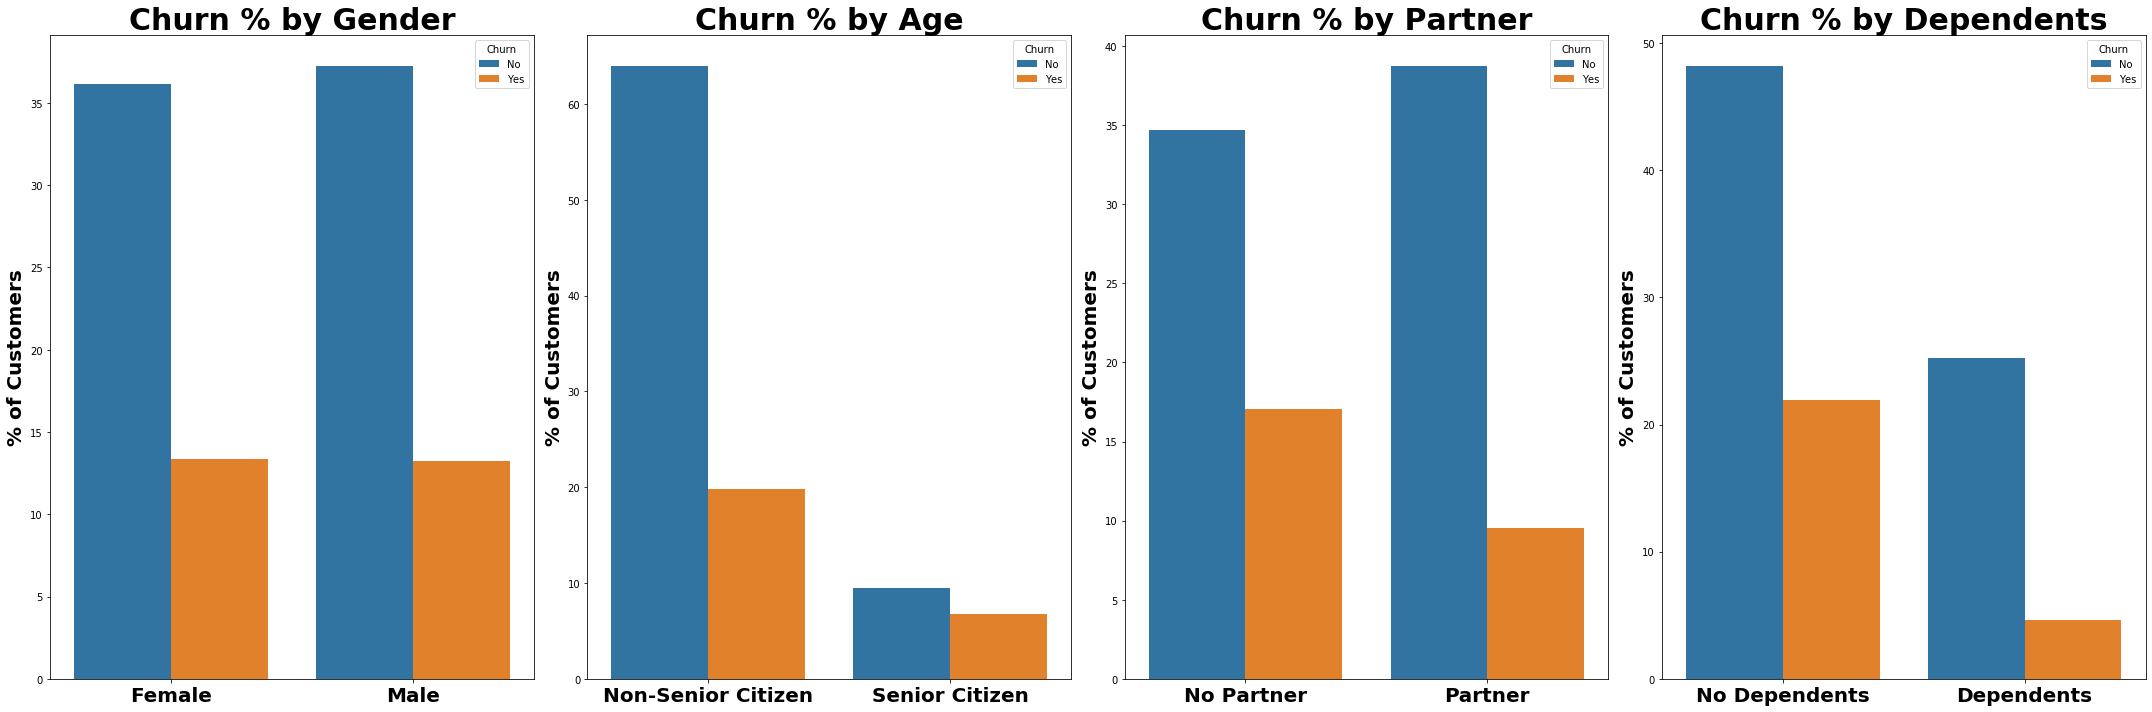

In [16]:
fig = plt.figure(figsize = (30,10))
def plot_gender_dist(df):
    plt.subplot(141)
    g = df.copy()
    g = g.groupby('gender')['Churn'].value_counts().to_frame()
    g = g.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    g['pct_total'] = (g['pct_total']/len(df)) * 100
    t = sns.barplot('gender', y = 'pct_total', hue = 'Churn', data = g)
    t.set_title('Churn % by Gender', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('')
    t.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
    t.set_xticklabels(labels = ['Female', 'Male'], fontweight = 'bold', fontsize = 20)
    plt.tight_layout()
    
def plot_age_dist(df):
    plt.subplot(142)
    g = df.copy()
    g = g.groupby('SeniorCitizen')['Churn'].value_counts().to_frame()
    g = g.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    g['pct_total'] = (g['pct_total']/len(df)) * 100
    t = sns.barplot('SeniorCitizen', y = 'pct_total', hue = 'Churn', data = g)
    t.set_title('Churn % by Age', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('')
    t.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
    t.set_xticklabels(labels = ['Non-Senior Citizen', 'Senior Citizen'], fontweight = 'bold', fontsize = 20)
    plt.tight_layout()
    
def plot_partner_dist(df):
    plt.subplot(143)
    g = df.copy()
    g = g.groupby('Partner')['Churn'].value_counts().to_frame()
    g = g.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    g['pct_total'] = (g['pct_total']/len(df)) * 100
    t = sns.barplot('Partner', y = 'pct_total', hue = 'Churn', data = g)
    t.set_title('Churn % by Partner', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('')
    t.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
    t.set_xticklabels(labels = ['No Partner', 'Partner'], fontweight = 'bold', fontsize = 20)
    plt.tight_layout()
    
def plot_dependents_dist(df):
    plt.subplot(144)
    g = df.copy()
    g = g.groupby('Dependents')['Churn'].value_counts().to_frame()
    g = g.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    g['pct_total'] = (g['pct_total']/len(df)) * 100
    t = sns.barplot('Dependents', y = 'pct_total', hue = 'Churn', data = g)
    t.set_title('Churn % by Dependents', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('')
    t.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
    t.set_xticklabels(labels = ['No Dependents', 'Dependents'], fontweight = 'bold', fontsize = 20)
    plt.tight_layout()

plot_gender_dist(df_data)
plot_age_dist(df_data)
plot_partner_dist(df_data)
plot_dependents_dist(df_data)

We can draw following conclusions from the above plots:

1. Our dataset has similar numbers of Male and Female customers. Also, proportion of customers churned is almost equal in both genders.
2. Our dataset has less senior citizens and non-senior citizens. Overall, a higher proportion of senior citizens will churn than non-senior citizens.
3. Customers without partners churn slightly more than those with partners.
4. Customers withot dependents churn slightly more than those with dependents.

#### Main Services

There are three categorical features which tells the type of services subscribed by the customer - PhoneService, MultipleLines and InternetService.

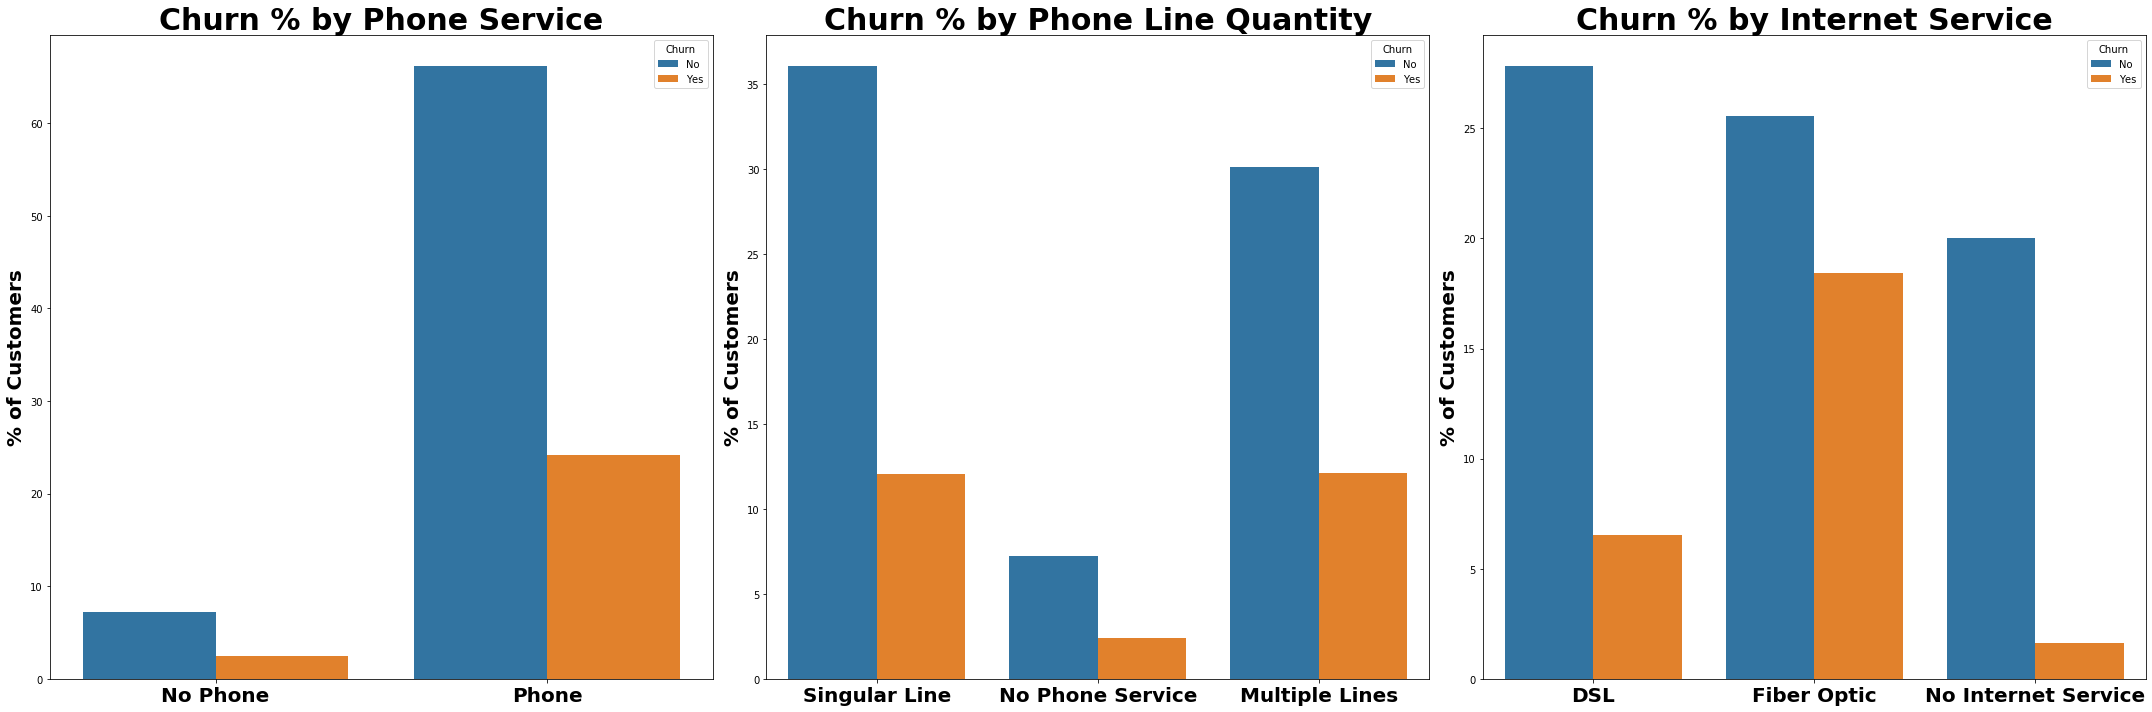

In [17]:
fig = plt.figure(figsize = (30,10))
def plot_phoneservice_dist(df):
    plt.subplot(131)
    g = df.copy()
    g = g.groupby('PhoneService')['Churn'].value_counts().to_frame()
    g = g.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    g['pct_total'] = (g['pct_total']/len(df)) * 100
    t = sns.barplot('PhoneService', y = 'pct_total', hue = 'Churn', data = g)
    t.set_title('Churn % by Phone Service', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('')
    t.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
    t.set_xticklabels(labels = ['No Phone', 'Phone'], fontweight = 'bold', fontsize = 20)
    plt.tight_layout()
    
def plot_phonelinequantity_dist(df):
    plt.subplot(132)
    g = df.copy()
    g = g.groupby('MultipleLines')['Churn'].value_counts().to_frame()
    g = g.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    g['pct_total'] = (g['pct_total']/len(df)) * 100
    t = sns.barplot('MultipleLines', y = 'pct_total', hue = 'Churn', data = g)
    t.set_title('Churn % by Phone Line Quantity', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('')
    t.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
    t.set_xticklabels(labels = ['Singular Line','No Phone Service', 'Multiple Lines'], fontweight = 'bold', fontsize = 20)
    plt.tight_layout()
    
def plot_internetservice_dist(df):
    plt.subplot(133)
    g = df.copy()
    g = g.groupby('InternetService')['Churn'].value_counts().to_frame()
    g = g.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    g['pct_total'] = (g['pct_total']/len(df)) * 100
    t = sns.barplot('InternetService', y = 'pct_total', hue = 'Churn', data = g)
    t.set_title('Churn % by Internet Service', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('')
    t.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
    t.set_xticklabels(labels = ['DSL','Fiber Optic', 'No Internet Service'], fontweight = 'bold', fontsize = 20)
    plt.tight_layout()

plot_phoneservice_dist(df_data)
plot_phonelinequantity_dist(df_data)
plot_internetservice_dist(df_data)

We can draw following conclusions from the above plots:

1. Customers with phone service churn ~25% of the time.
2. Of customers with phone service, customers with multiple lines have a slightly higher churn rate than those with a singular line.
3. Customers with only phone service (and no internet service) have lower churn rate than those having internet service. Higher number of customers have fiber optic internet service.
4. Also, fiber optic internet customers churn at significantly higher proportions than DSL or No Internet customers.

#### Add-On Services

Customers have subscribed various add-on services along with phone and internet services. Let's look at the churn rate for customers with add-on services.

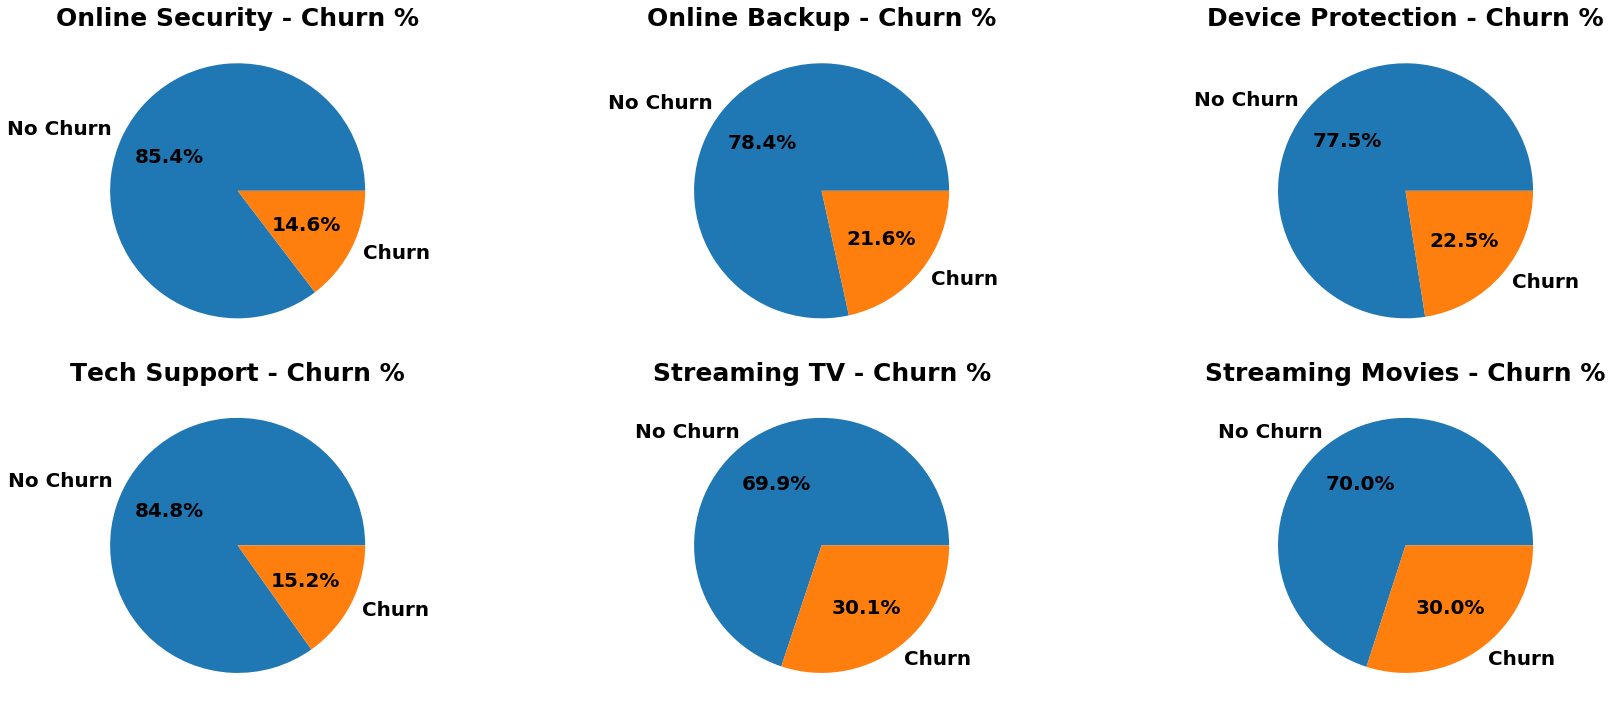

In [18]:
def plot_services(df):
    copy = df[df.InternetService != 'No']
    
    fig = plt.figure(figsize = (25, 10))
    
    plt.subplot(231)
    copy1 = copy[copy.OnlineSecurity == 'Yes']
    plt.pie(copy1.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Security - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(232)
    copy2 = copy[copy.OnlineBackup == 'Yes']
    plt.pie(copy2.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Backup - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(233)
    copy3 = copy[copy.DeviceProtection == 'Yes']
    plt.pie(copy3.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Device Protection - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(234)
    copy4 = copy[copy.TechSupport == 'Yes']
    plt.pie(copy4.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Tech Support - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(235)
    copy5 = copy[copy.StreamingTV == 'Yes']
    plt.pie(copy5.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming TV - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(236)
    copy6 = copy[copy.StreamingMovies == 'Yes']
    plt.pie(copy6.Churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming Movies - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.tight_layout()
    
plot_services(df_data)

Customers with TV streaming and/or Movie Streaming services churn more than all other add-on services.

#### Contracts

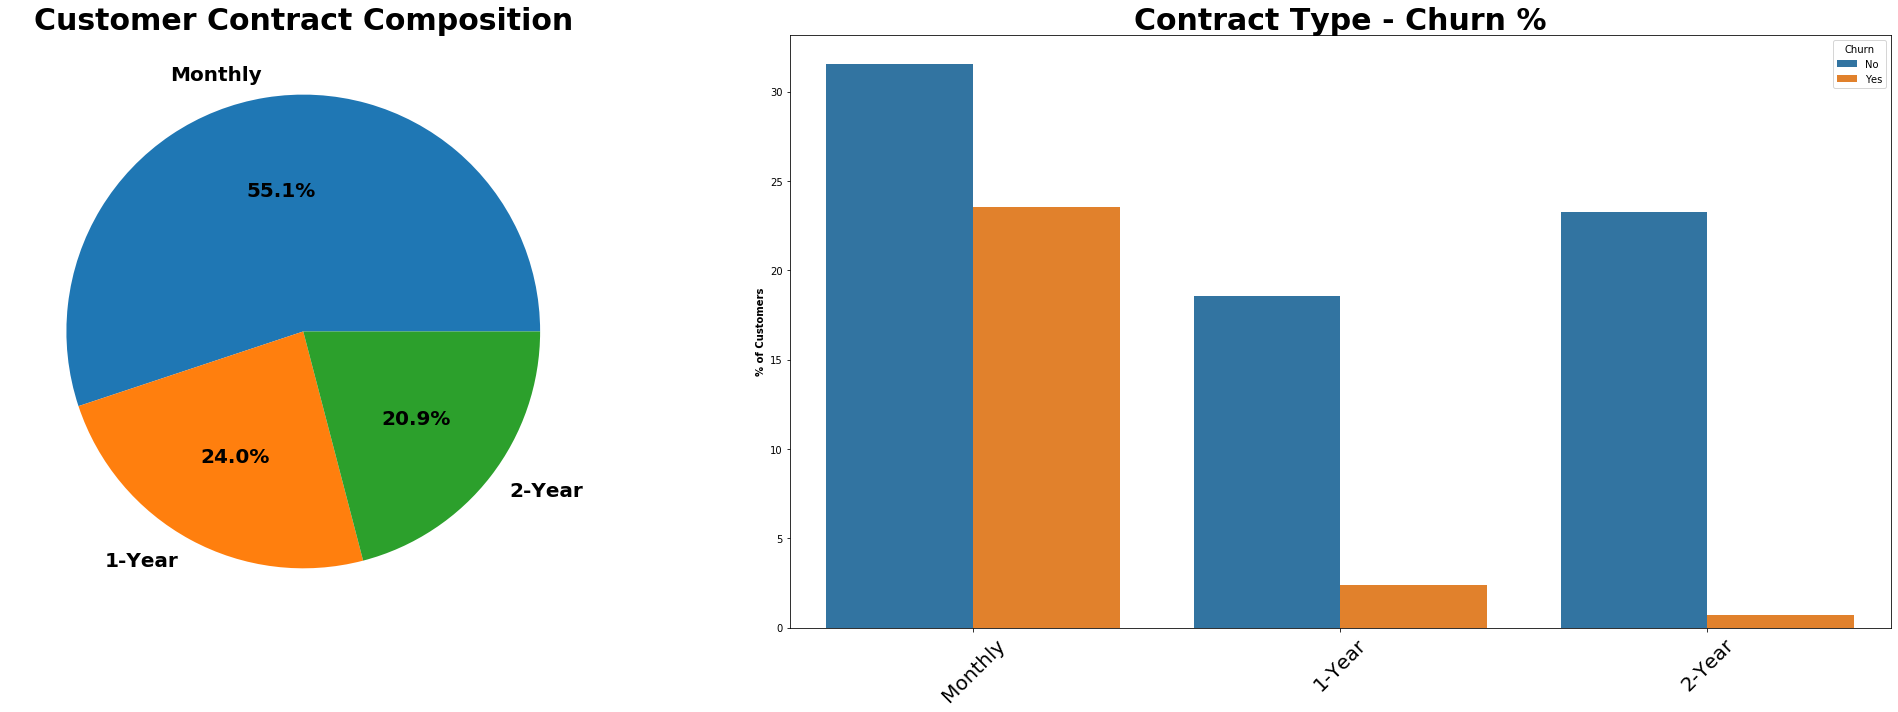

In [21]:
def plot_contracts(df):
    
    copy = df.copy()
    
    plt.figure(figsize = (30, 10))
    
    plt.subplot(121)
    plt.pie(copy.Contract.value_counts(), labels = ['Monthly', '1-Year', '2-Year'], autopct = '%.1f%%', textprops = {'fontweight':'bold', 'fontsize': 20})
    plt.title('Customer Contract Composition', fontweight = 'bold', fontsize = 30)
    
    
    plt.subplot(122)
    plt.title('Churn % by Contract Type', fontsize = 30, fontweight = 'bold')
    copy = copy.groupby('Contract')['Churn'].value_counts().to_frame()
    copy = copy.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df)) * 100
    a = sns.barplot('Contract', y = 'pct_total', hue = 'Churn', data = copy)
    a.set_title('Contract Type - Churn %', fontsize = 30, fontweight = 'bold')
    a.set(xticklabels = ['Monthly', '1-Year', '2-Year'])
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight = 'bold')
    a.set_xticklabels(a.get_xticklabels(), fontsize = 20, rotation = 45)
    plt.tight_layout()

plot_contracts(df_data)

We can draw the following conclusions from above plots:

1. More than half of the customers use a monthly payment option.
2. Significantly more customers churn on monthly plans.
3. The longer the plan, the lower the churn rate.

#### Paperless Billing

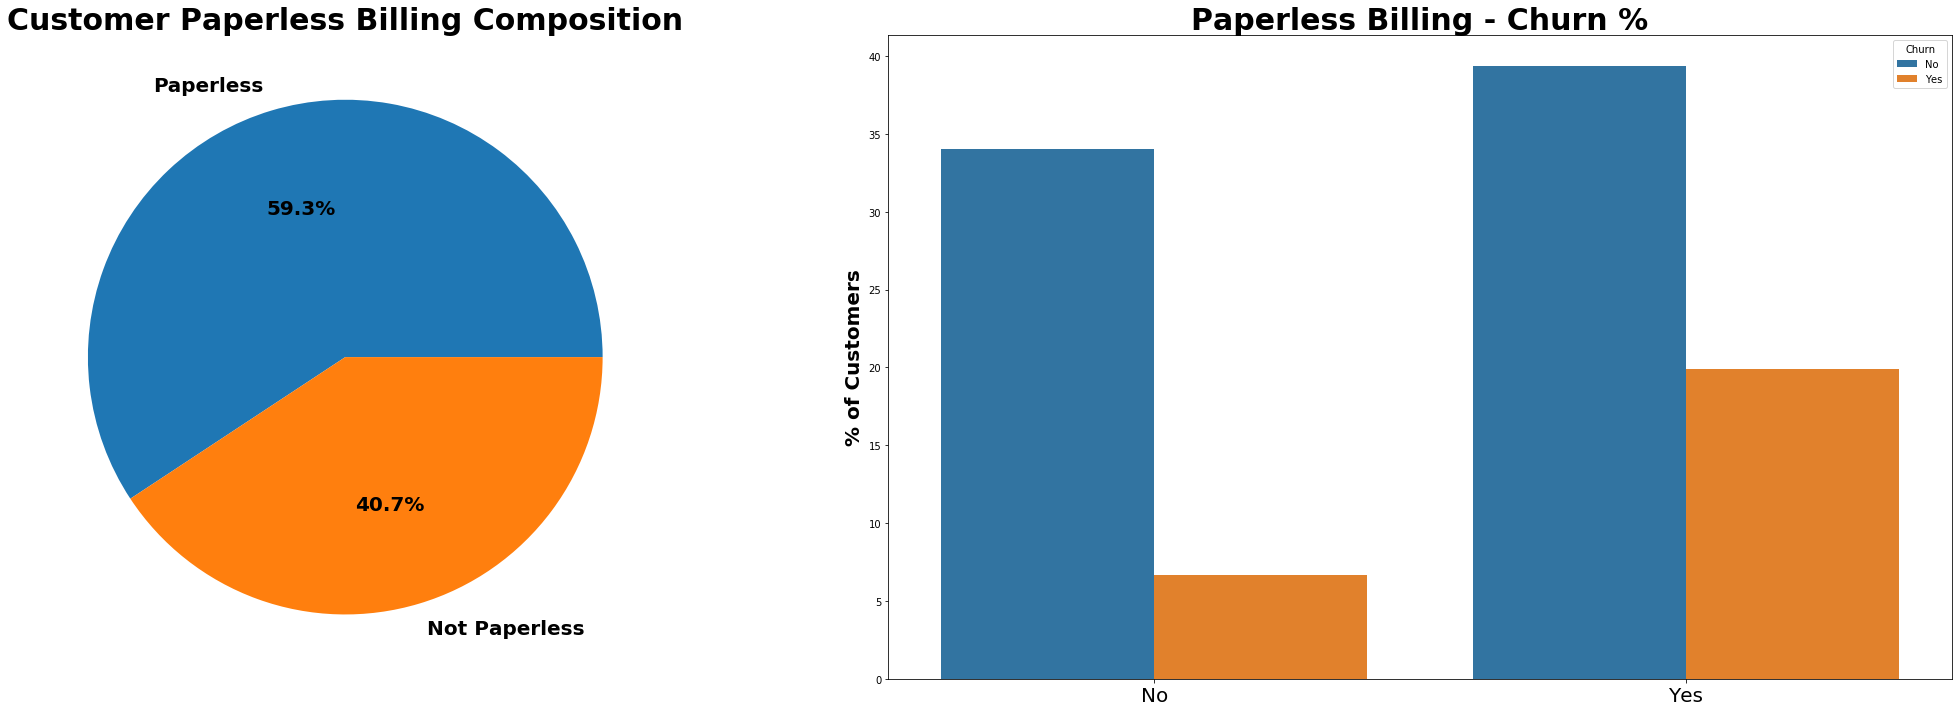

In [22]:
def plot_paperless(df):
    
    copy = df.copy()
    
    plt.figure(figsize = (30, 10))
    
    plt.subplot(121)
    plt.pie(copy.PaperlessBilling.value_counts(), labels=['Paperless','Not Paperless'], autopct = '%.1f%%', textprops = {'fontweight':'bold', 'fontsize': 20})
    plt.title('Customer Paperless Billing Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(122)
    plt.title('Churn % by Billing Type', fontsize = 30, fontweight = 'bold')
    copy = copy.groupby('PaperlessBilling')['Churn'].value_counts().to_frame()
    copy = copy.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df)) * 100
    a = sns.barplot('PaperlessBilling', y = 'pct_total', hue = 'Churn', data = copy)
    a.set_title('Paperless Billing - Churn %', fontsize = 30, fontweight = 'bold')
    a.set_xticklabels(a.get_xticklabels(), fontsize = 20)
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
    
    
    plt.tight_layout()
    
plot_paperless (df_data)

About 60% of the customers have paperless billing. Also, customers with paperless have a significantly higher churn rate than customers with non-paperless billing.

#### Payment Methods

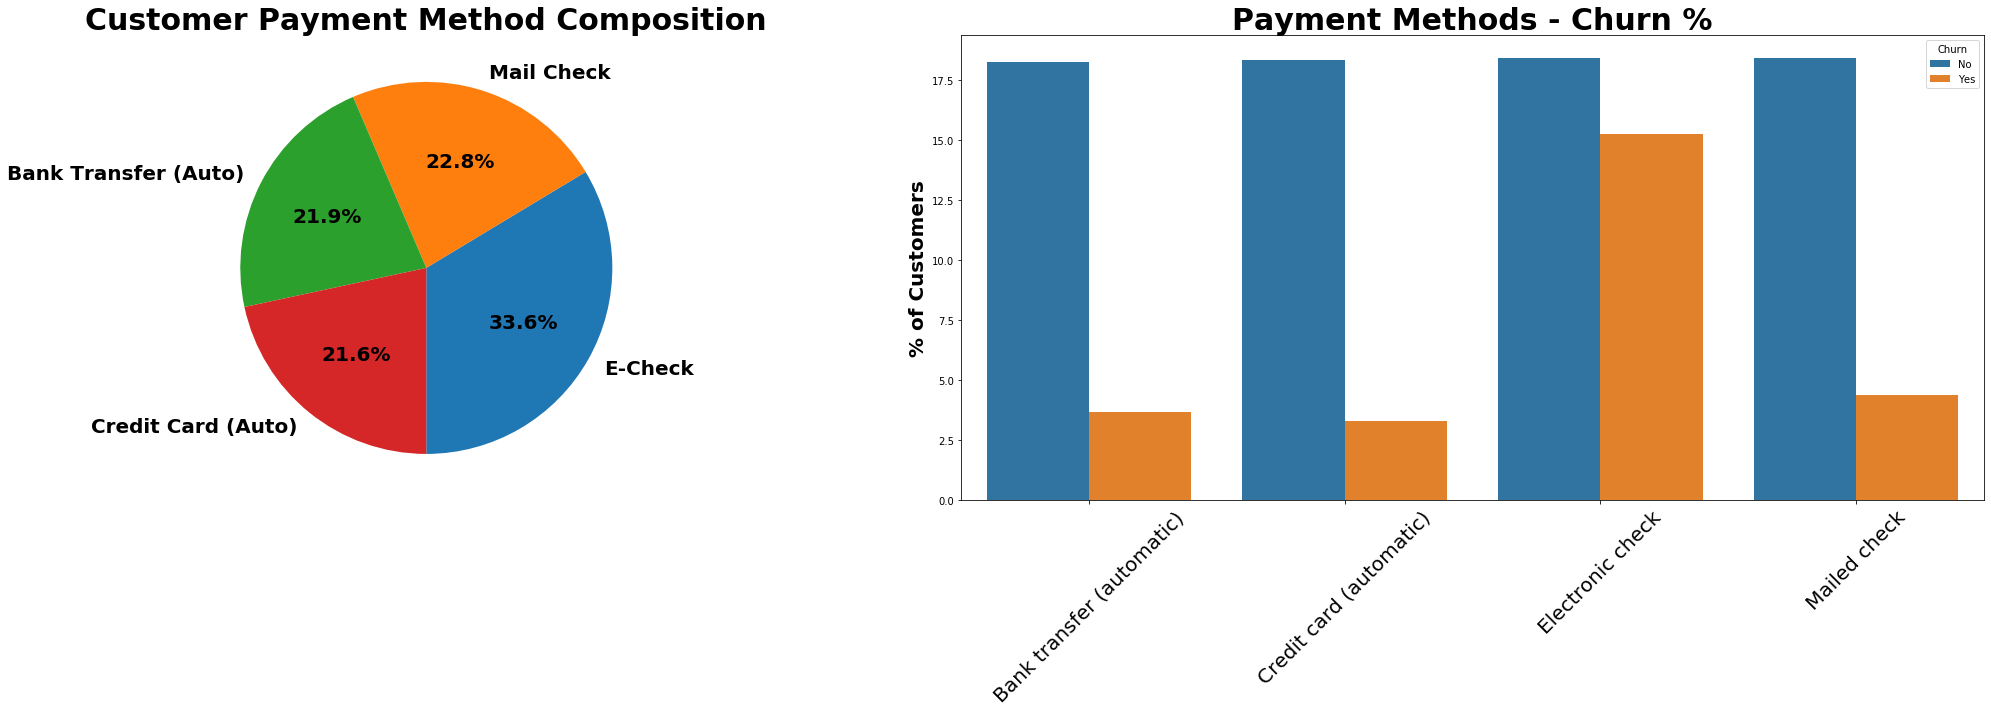

In [23]:
def plot_pay_methods(df):
    
    copy = df.copy()
    
    plt.figure(figsize = (30, 10))
    
    plt.subplot(121)
    plt.pie(copy.PaymentMethod.value_counts(), labels = ['E-Check', 'Mail Check' , 'Bank Transfer (Auto)', 'Credit Card (Auto)'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'}, startangle = -90)
    plt.title('Customer Payment Method Composition', fontsize = 30, fontweight = 'bold')
    
    plt.subplot(122)
    copy = copy.groupby('PaymentMethod')['Churn'].value_counts().to_frame()
    copy = copy.rename({'Churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df))*100
    a = sns.barplot('PaymentMethod', 'pct_total', 'Churn', data = copy)
    a.set_title('Payment Methods - Churn %', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
    a.set_xticklabels(a.get_xticklabels(), fontsize = 20, rotation = 45)
    
    plt.tight_layout()
    
plot_pay_methods(df_data)

We can see that customers with Automatic payment methods have significantly lower churn than other payment methods. Customers with e-check have higher churn than other payment methods.

## Conclusion

We have look various ways to understand the features in our dataset and how churn is affected due to each feature. The data can be looked at numerous ways and the above visualizations are only few ways to understand the data. Before building the classification models, it is necessary to have understanding of business domain and the data structure. For example, we have found the overall churn of 27% which can be good or bad depending on the telecom industry churn rates benchmarks. 

In the next blog, I will show predictive classificative models using two algorithms - Logistic Regression and Decision Tree - which can be used to predict whether customer will churn or not and take preventive actions for the customers with higher likelihood of churning.

If you have any comments or suggestions please comment below or reach out to me at - [Twitter](https://twitter.com/rahulsingla0959) or [LinkedIn](https://www.linkedin.com/in/rahul-singla1/)